## Distribution plots

In this tutorial, we are going to play around with visualizing distributions of data. Data can be complex and interrelated but, ultimately, a data set is composed of *variables* that can take on *values*. An important first step in analyzing data is often to see how those values are *distributed* – that is, to answer questions like

* what is the range of values (and does that range make sense)?
* are some values more common than others?
* is there a "typical" value?
* are all the data near the "typical" value, or are they all very different?
* can we describe the data succinctly using a known *distribution*?
  - do the data come from an approximately *normal* (or *Guassian*) distribution?
  - if not, do they come from some other known distribution (or are they just crazy)?
* Are two (or more) distributions the...
  - same for all practical intents and purposes?
  - different looking enough for further investigation?
 

There are various fancy ways to do this, but the first step, and often the only necessary step, is to just *look at the data!* So, let's do that now!

The distribution plots we'll play with today are:

* histograms
* Kernel Density Estimate plots (KDEs)
* Emperical Cumulative Density Estimate plots (ECDEs)
* Categorical or Strip plots
* Violin Plots
* Boxplots

Don't worry, we'll unpack these in turn. But they all have something in common; they all attempt to communicate the same thing – *what do the distributions look like?* – but do so in ways the emphasize different features and show different levels of detail.

### Preliminaries

#### As always, we need to import some "data science-y" libraries

* numpy to make numbers
* pandas for the i/o
* matplotlib and seaborn to plot file contents

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read our .csv file

In [2]:
myDataFromFile = pd.read_csv("datasets/007DataFile.csv")

#### Now let's make sure we read something that looks okay

In [3]:
display(myDataFromFile)

,Group,Value
0,A,-0.191644
1,A,-0.142608
2,A,1.124331
3,A,0.351730
4,A,2.091361
...,...,...
195,B,1.182375
196,B,4.364442
197,B,0.726250
198,B,-0.987532


Notice that this data frame has two columns, but one of them is not numeric. It is a *grouping variable* that is stored as a text *string* rather than as a number. This type of data is refered to as '*tidy*'.

The same data could have stored in two columns, a "A" column and a "B" column. This kind of data set is 'untidy', and we have already encountered such data (the freezer data). Untidy data is not necessarily evil or anything; for the freezer data, the same variable (temperature) was measured over time, so it actually made sense to have rows represent time points, and the freezers in the columns. 

But a big advantage of tidy data is that it lets us more easily segregate data by the grouping variable(s). In fact, a big part of data science is actually "*data wrangling*", much of which involves making messy data into a tidy form for analysis.

### Visualization

And now for the fun way of looking at data...
as visuals!

The seaborn library (which we imported as "sns") is a "high-level" plotting system. "High-level" because it takes care of many of the plotting details for you, and most of its commands make pretty good looking plots off the shelf.

So let's take seaborn out for a ride!

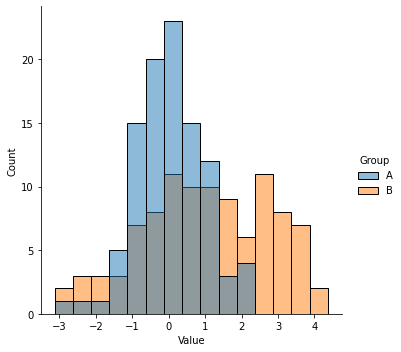

In [12]:
sns.displot(myDataFromFile, x="Value", hue="Group", kind="hist")

Here, we made one call to `seaborn.displot()`, which is short for *distribution plot*. In the three arguments to the call, we 1) told `seaborn.displot()` what data frame to use, 2) mapped the *Value* variable to the x axis of the plot and, 3) mapped the *Group* variable the color of the bars. `seaborn.displot()` automatically did a lot of stuff for us: it defaulted to a *histogram* to show the data, picked the bin width of the histograms and the specific colors to use (orange & blue – go Gators!), labeled the x and y axes appropriately, and even made a legend for us! We can customize all of these things of course, but it's nice to have a command like `displot()` that makes a plot with decent defaults.

Histograms, by definition, are *discreet*: they divide the range of data values into *bins*, and then count the number of observations in each bin, and then maps these counts to the y axis. Data, however, are often *continuous*, with no actual sharp transitions across (arbitrary) bin boundaries. So it would be nice to represent the data in a way reflects the underlying smoothness. One such plot is called a *Kernel Density Estimate* or *KDE* plot. We won't go too deeply under the hood of a KDE plot (calculus required!) but it essentially takes a histogram and blurs it to yield a continuous function (just like if you blur your eyes a sharp point becomes a continuous blob).

All we have to do to make a KDE plot (without calculus!) is to tell `seaborn.displot()` that that's what we want:

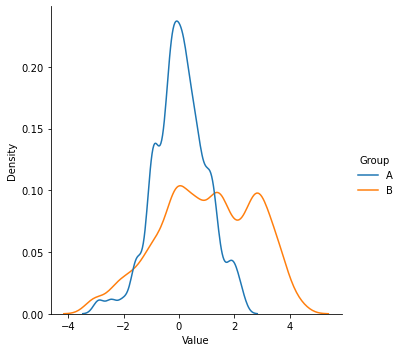

In [15]:
sns.displot(myDataFromFile, x="Value", hue="Group", kind="kde", bw_adjust=0.5)

As we can see, this plot conveys the data distributions in a much cleaner and visually appealing way.

We can also play around with the appearance of the plot by supplying optional arguments to `seaborn.displot()`. For example, we can fill in the areas under the curves, and make the fill transparent so we can see one curve through the other:

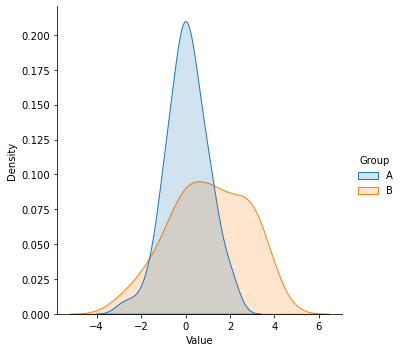

In [6]:
sns.displot(myDataFromFile, x="Value", hue="Group", kind="kde", fill=True, alpha=0.2)

The argument `fill` is self-explanitory, and `alpha`, for whatever reason, is the universal variable for "transparency" in computer graphics. It always ranges from 0 to 1, with 1 being opaque and 0 being invisible.

This is the part where you Google and play around and see what other ways you can change the appearance of our plot!

Another usefull way to look at distributions is with the *Empirical Cumulative Density Estimate* plot or *ECDF*. It plots, for each value on the x axis, the proportion of the data that fall to left of that value. It hence goes from 0.0 on the left (just below the very smallest data value) to 1.0 on the right (just above the very highest data value). 

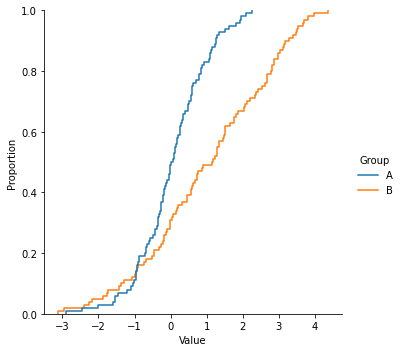

In [7]:
sns.displot(myDataFromFile, x="Value", hue="Group", kind="ecdf")

Visually, you can see that - calculus alert! - the *ECDF* is essentially the integral of the *KDE*. Sweet! In both the ECDF and the KDE plots, we can clearly see the relative shift in the two distributions (median or mean) in addition to the different widths (standard deviations).

 The difference in medians or means is shown by the relative shift of the two distributions in both types of plot. In the *ECDF*, the value on the x axis corresponding to midpoint on the y axis – at 0.5 – is by definition the median.
 
 The difference in standard deviations in the *KDE* is shown by the relative widths or "fatnesses" of the two distributions, whereas in the *ECDF*, it is given by the steepnesses (slopes) of the curve.
 
 Which type of plot is better is both situational and a matter of taste; I like the *KDE* for appreciating the "vibe" of distributions, but the *ECDF* can be better at revealing small shifts in the mean.

Seaborn also provides some built-in themes to change the overall appearance of plots:

In [ ]:
sns.set_style("darkgrid")
sns.displot(myDataFromFile, x="Value", hue="Group", kind="ecdf")

That's nice! But, personally, I'd like more ticks/gridlines on the y axis and, since 0.5 corresponds to the median, it would be nice to have a gridline exactly there. To do this, we'll delve into the "lower level" `matplotlib` functions. In this particular case, we'll use the `matplotlib.pyplot.yticks()` function to make gridlines where we want them, and we'll use `np.arange()` to make the exact values for the gridlines. And remember, we imported `matplotlib.pyplot` as `plt`, so that will save us a little typing!

In [ ]:
sns.displot(myDataFromFile, x="Value", hue="Group", kind="ecdf")
plt.yticks(np.arange(0, 1, 0.1));

I always want to read `arange()` as "arrange", but it's really "a range", as in "a range of values" – the three arguments to `np.arange()` are the minimum, maximum, and step size of the range. Now we can literally see that the two medians are about 0 and 1. Since the distributions are "normalish" or roughly Gaussian, these correspond to the means as well. 

We can also look at all the data points if we want:

In [ ]:
sns.catplot(data=myDataFromFile, x="Group", y="Value")

The command `seaborn.catplot()` makes a *categorical plot*, i.e. a plot with a categorical x axis and a numerical y axis. Notice that `seaborn.catplot()` jitters the data points horizontally so you can see more of them without occlusion. This type of plot is also called a *strip plot*.

Also notice that our theme has been applied to every plot since we called `sns.set_style("darkgrid")`.

---

##### Quick quiz! 
Can you make the data points transparent so that data points on top of one another appear as darker clusters?

---

It's worth reiterating and emphasizing that, in the categorical plot, we changed the the mapping of the variables. In the previous plots, both disributions plotted on a single coordinate system, and the categorical variable was mapped to a color. This is great for one and sometimes two distributions. But with multiple distributions, i.e. multiple values of a categorical grouping variable, plots can get busy and hard to read. Mapping the grouping variable to position on the x axis is a great solution, as it pulls the distributions apart so they can be visually compared more easily.

Another kind of plot that maps a grouping variable to the x axis is a *violin plot*. Here's one:

In [ ]:
sns.violinplot(data=myDataFromFile, x="Group", y="Value")

The violin plot is essentially a KDE plot in which the distributions are flipped on their sides, separated along the x axis, and plotted along with a mirror image. Sometimes the actual data are plotted as well. As with all plots, there are various things we can tinker with (Google is your friend!). For example, we can plot the data values as "sticks" instead of points:

In [ ]:
sns.violinplot(data=myDataFromFile, x="Group", y="Value", inner="stick")

Notice that both histograms and categorical (strip) plots attempt to show the data directly, whereas KDE and violin plots abstract the data a little by trying to estimate the smooth distribution underlying the data. We can do a further extraction by plotting some summary numbers instead of the data themselves using a *box plot*. 

In [ ]:
sns.boxplot(data=myDataFromFile, x="Group", y="Value")

A boxplot shows 5 summary numbers. The *median* is shown by a horizontal line. The upper and lower bounds of the *interquartile range* or *IQR* are shown by a box. Finally, values at 1.5x the IQR above and below the median are plotted as *whiskers* (boxplots are sometimes called box-and-whiskers plots). Any data points falling outside the whiskers plotted individually as potential outliers.

Sometimes it is helpful to combine plots to show both the data and some summary numbers:

In [ ]:
sns.boxplot(data=myDataFromFile, x="Group", y="Value")
sns.stripplot(data=myDataFromFile, x="Group", y="Value", alpha = 0.42)

We can "check our work" by summarizing the data and comparing the percentiles with what's shown by are boxes.

In [ ]:
myDataFromFile.groupby("Group").describe()

Looks good!

But – wait! – let's unpack the call above a little bit. As we've already seen, data frames in pandas "know" how to do things. We saw last time that they know how to make a boxplot of themselves, for example.

In the call `myDataFromFile.groupby("Group").describe()`, the `myDataFromFile.groupby("Group")` part tells the data frame to group itself by the "Group" variable. And then the `.describe()` tells it to describe itself for us. 
If you've used R and the tidyverse, then this is roughly equivalent to 
```
myDataFromFile %>%
    group_by("Group") %>%
    summarize()
```


If we have our current data frame to make a boxplot of itself...

In [ ]:
myDataFromFile.boxplot()

... it's not super useful because it looks at the data, sees only one numeric variable, and makes a boxplot of that variable (from both groups). But since it turns out that data frames know how to group themselves, maybe we can group and then boxplot, just like we grouped and then described above. Let's try:

In [ ]:
myDataFromFile.groupby("Group").boxplot()

Nice! I prefer the seaborn version, but this is a nice tool to have in out toolbelt.

Okay, so now we know how to make a number of *distribution* plots in python, and know a little bit about how to work with data that have a grouping variable. Sam would be proud!